# DATA 605 - Classification Exercise
*Based in part on Patrick Maher's "Sports Body Types" analysis (https://github.com/pmaher86/sports-body-types)
and Eytan Adar's EDA Classification Lab (2016).*

In [22]:
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.metrics as skm
import sklearn.cluster as skc
import sklearn.preprocessing as skp
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load NBA player stats
We'll be trying to model players' position as a function of their heigh and weight.
For those unfamiliar with basketball, there are typically five positions which correspond to where players are positioned on the court and the roles they play during offense and defense.
- PG (Point Guard)
- SG (Shooting Guard)
- SF (Small Forward)
- PF (Power Forward)
- C (Center)

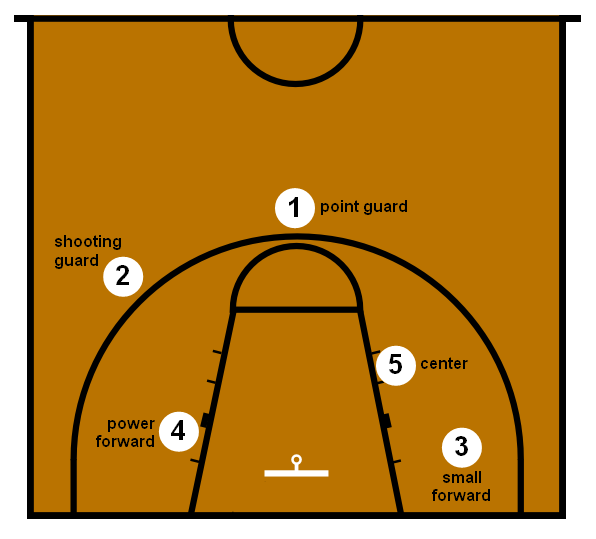

In [23]:
nba_data_url='https://drive.google.com/uc?export=download&id=1AQthd3cW28XGn9Fql5ivqFQ0VodoJsFR'
nba_frame = pd.read_csv(nba_data_url)
nba_frame.head()

,Index,height,name,position,weight
0,0,80,Brandon Bass,PF,250
1,1,74,Avery Bradley,PG,180
2,2,78,Jae Crowder,SF,235
3,3,81,Jeff Green,SF,235
4,4,72,Jameer Nelson,PG,190


<AxesSubplot: xlabel='weight', ylabel='height'>

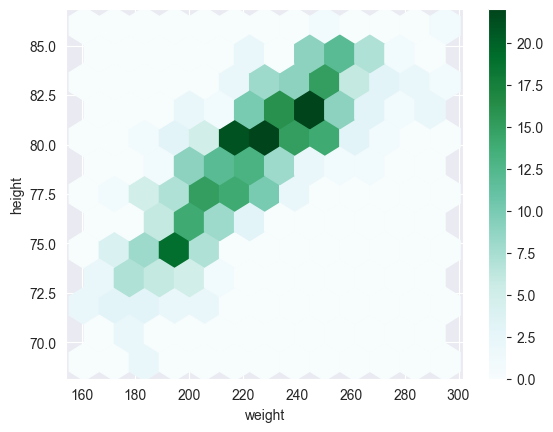

In [24]:
nba_frame.plot(x='weight',y='height', kind='hexbin', gridsize=12)

In [25]:
alt.Chart(nba_frame).mark_point().encode(
    alt.X('weight', scale=alt.Scale(zero=False)),
    alt.Y('height', scale=alt.Scale(zero=False)),
    color='position'
)

alt.Chart(...)

# K-Means
(A reminder of what clustering looks like for this data.)

In [26]:
nba_hw_frame = nba_frame[['height', 'weight']]
nba_hw_frame.head() 

,height,weight
0,80,250
1,74,180
2,78,235
3,81,235
4,72,190


In [27]:
# Standardize (scale, recenter) the height and weight columns - otherwise distances will mostly be based on weight
scaler = skp.StandardScaler()
nba_hw_standardized = scaler.fit_transform(nba_hw_frame)
nba_hw_standardized = pd.DataFrame(nba_hw_standardized)
nba_hw_standardized.columns = [nba_hw_frame[:0]]
nba_hw_standardized.head()

,height,weight
0,0.223250,1.054122
1,-1.534592,-1.628986
2,-0.362697,0.479170
3,0.516224,0.479170
4,-2.120539,-1.245685


In [28]:
kmeans_model = skc.KMeans(n_clusters=5)
kmeans_model.fit(nba_hw_standardized)
centroids = kmeans_model.cluster_centers_ # these are the centers of the clusters
centroids = scaler.inverse_transform(centroids) # reverse our standardization if we want them in real units
centroids

array([[ 83.10588235, 258.31764706],
       [ 76.4691358 , 200.58024691],
       [ 73.29310345, 184.36206897],
       [ 79.27358491, 217.66037736],
       [ 81.44859813, 236.10280374]])

In [29]:
nba_frame['cluster_labels_kmeans'] = kmeans_model.labels_

In [30]:
# Plot the clusters with their centroids.
points_plot = alt.Chart(nba_frame).mark_point().encode(
    alt.X('weight', scale=alt.Scale(zero=False)),
    alt.Y('height', scale=alt.Scale(zero=False)),
    color='cluster_labels_kmeans:N'
)
centroid_plot = alt.Chart(pd.DataFrame(centroids)).mark_point(shape='diamond',color='black').encode(
    x='1:Q', y='0:Q'
)
(points_plot + centroid_plot)

alt.LayerChart(...)

Here's the original data as a reminder

In [31]:
alt.Chart(nba_frame).mark_point().encode(
    alt.X('weight', scale=alt.Scale(zero=False)),
    alt.Y('height', scale=alt.Scale(zero=False)),
    color='position'
)

alt.Chart(...)

# K-Nearest Neighbors
Let's use the existing NBA player data to try to classify player positions based on height and weight.

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
n = 5  # How many neighbours to use

In [34]:
nba_neigh = KNeighborsClassifier(n_neighbors=n)
nba_neigh.fit(nba_hw_standardized[['height','weight']],nba_frame['position'])
nba_neigh_predictions = nba_neigh.predict(nba_hw_standardized[['height','weight']])
nba_neigh_predictions

array(['C', 'PG', 'SF', 'PF', 'PG', 'C', 'PG', 'SG', 'PF', 'SG', 'SG',
       'SG', 'SG', 'C', 'SG', 'SF', 'PG', 'PF', 'PG', 'SF', 'SF', 'C',
       'SF', 'C', 'PG', 'C', 'PF', 'PG', 'SF', 'PF', 'PF', 'PF', 'C',
       'PG', 'SF', 'PG', 'SF', 'PG', 'PG', 'C', 'PF', 'SF', 'SF', 'PF',
       'SG', 'SF', 'C', 'SF', 'PF', 'PF', 'SG', 'C', 'SG', 'SF', 'PF',
       'PF', 'SF', 'SG', 'SF', 'SG', 'SG', 'PF', 'SF', 'PF', 'PF', 'PG',
       'C', 'PF', 'SF', 'PF', 'C', 'SG', 'PG', 'PG', 'SF', 'C', 'PG', 'C',
       'SF', 'SG', 'SG', 'C', 'PF', 'PG', 'SG', 'PF', 'SG', 'SF', 'SG',
       'SG', 'PG', 'C', 'SF', 'PG', 'PF', 'C', 'C', 'PG', 'SG', 'PF',
       'PF', 'SG', 'PF', 'PF', 'SF', 'PG', 'PF', 'SG', 'PF', 'SG', 'C',
       'PG', 'PG', 'PG', 'PF', 'C', 'SF', 'PG', 'PG', 'SG', 'PG', 'SG',
       'SF', 'C', 'PF', 'PF', 'PF', 'PF', 'PG', 'SG', 'SF', 'PF', 'PF',
       'PG', 'C', 'C', 'PF', 'C', 'PF', 'PG', 'SG', 'PF', 'PG', 'SG',
       'PF', 'PF', 'PF', 'PG', 'SG', 'SF', 'C', 'PF', 'SG', 'SF', 'PF

Now we can try it on a few possible players.

In [35]:
shaq = pd.DataFrame([{'height':85,'weight':325}]) #listed weight/height from when he played (he isn't in the dataset)
shaq = scaler.transform(shaq) #make sure to transform
print(nba_neigh.predict(shaq))  #he played center

['C']


In [36]:
wes = pd.DataFrame([{'height':76,'weight':205}])  #I've definitely never played
wes = scaler.transform(wes)
print(nba_neigh.predict(wes))

['SG']


In [37]:
lebron = pd.DataFrame([{'height':80,'weight':250}]) # listed weight/height in our training dataset
lebron = scaler.transform(lebron)
print(nba_neigh.predict(lebron))  #he plays at small forward

['C']


In [38]:
nba_frame[nba_frame['name'] == 'LeBron James']

,Index,height,name,position,weight,cluster_labels_kmeans
164,164,80,LeBron James,SF,250,4


^ KNN actually got this wrong, even though LeBron is in the dataset. (Try some other numbers of neighbors and see how that changes things.)

**All Classifications**

We can actually check to see how our classifier would label ANY height/weight combination just by testing and plotting a whole bunch of values.

This allows us to see the *decision boundaries* between classes.

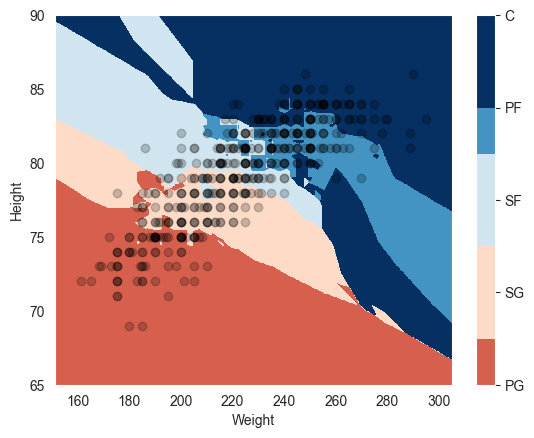

In [39]:

def plot_height_weight_pos(df, classifier, scaler, npts=500): #500x500 points will look smooth but take a few seconds
    xx,yy=np.meshgrid(np.linspace(df['weight'].min()-10,df['weight'].max()+10,num=npts), 
                      np.linspace(df['height'].min()-4,df['height'].max()+4,num=npts))
    Zstring = classifier.predict(scaler.transform(np.c_[yy.ravel(), xx.ravel()]))
    repdict = {'PG':1,'SG':2,'SF':3,'PF':4,'C':5} #map predictions to plottable numbers
    Z = np.zeros_like(Zstring)
    for k,v in repdict.items():
        Z[Zstring==k]=v
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.get_cmap('RdBu',6),vmin=0,vmax=5)
    plt.xlabel('Weight');plt.ylabel('Height')
    cbar = plt.colorbar(ticks=[1,2,3,4,5])
    cbar.ax.set_yticklabels(['PG', 'SG', 'SF', 'PF', 'C'])
    plt.scatter(df['weight'],df['height'], color="black",alpha=0.2)
    
plot_height_weight_pos(nba_frame,nba_neigh,scaler)


# Naive Bayes 

In [40]:
from sklearn.naive_bayes import GaussianNB
nba_gnb = GaussianNB().fit(nba_hw_standardized[['height','weight']],nba_frame['position'])

In [41]:
print(nba_gnb.predict(shaq))

['C']


In [42]:
print(nba_gnb.predict(lebron))

['PF']


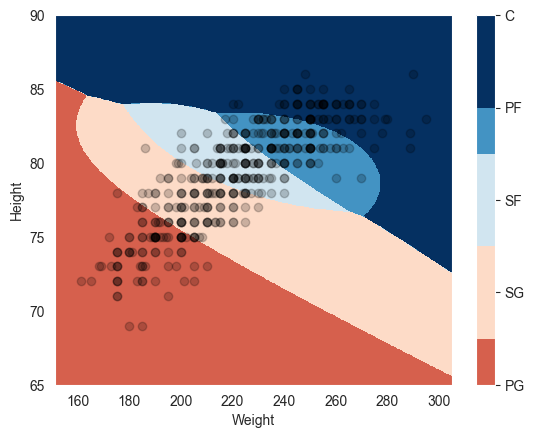

In [43]:
plot_height_weight_pos(nba_frame,nba_gnb,scaler)

# Evaluating Classification Performance
There are a number of scores and plots that we can compute or generate to evaluate classification results. We will introduce the following techniques:
- Accuracy
- Precision
- Recall
- F1 score
- Confusion Matrix

First, lets try actually getting a test sample.

In [44]:
from random import randint
hw_train, hw_test, pos_train, pos_test = sk.model_selection.train_test_split(
    nba_hw_standardized[['weight','height']],nba_frame['position'], test_size=0.5, random_state=randint(0,1000))

In [45]:
nba_gnb_test = GaussianNB().fit(hw_train,pos_train)
nba_gnb_predictions_test = nba_gnb.predict(hw_test)

In [46]:
#Accuracy
skm.accuracy_score(y_true=pos_test,
                   y_pred=nba_gnb_predictions_test)

0.5981735159817352

In [47]:
# Precision
skm.precision_score(y_true=pos_test,
                    y_pred=nba_gnb_predictions_test,
                    average='weighted')

0.6060374973290825

In [48]:
# Recall
skm.recall_score(y_true=pos_test,
                 y_pred=nba_gnb_predictions_test,
                 average='weighted')

0.5981735159817352

In [49]:
# F1 Score
skm.f1_score(y_true=pos_test,
             y_pred=nba_gnb_predictions_test,
             average='weighted')

0.6002838037353346

In [50]:
# Compute the confusion matrix
nba_gnb_test_cfmat = skm.confusion_matrix(
    y_true=pos_test,
    y_pred=nba_gnb_predictions_test,
    normalize='true')
nba_gnb_test_cfmat

array([[0.55      , 0.425     , 0.        , 0.025     , 0.        ],
       [0.22727273, 0.54545455, 0.        , 0.22727273, 0.        ],
       [0.        , 0.        , 0.77777778, 0.        , 0.22222222],
       [0.        , 0.18604651, 0.        , 0.53488372, 0.27906977],
       [0.        , 0.        , 0.19148936, 0.23404255, 0.57446809]])

Text(0.5, 1.0, 'Confusion Matrix')

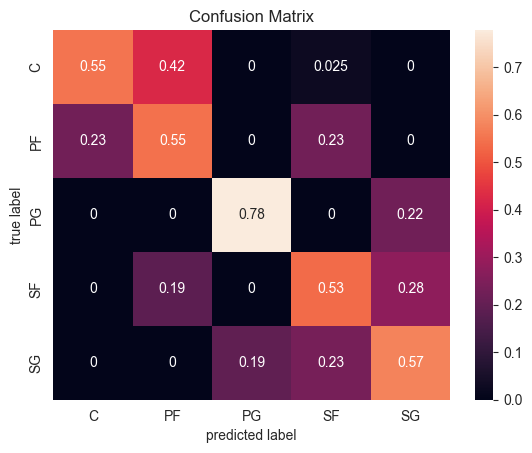

In [51]:
# Visualize the confusion matrix
sns.heatmap(nba_gnb_test_cfmat, 
            xticklabels=nba_gnb_test.classes_,
            yticklabels=nba_gnb_test.classes_,
            annot=True)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Confusion Matrix')


Text(0.5, 1.0, 'Confusion Matrix')

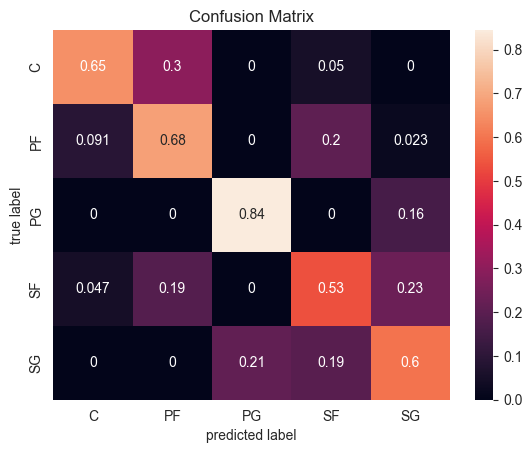

In [52]:
# For comparison, here's the confusion matrix for a KNN classifier trained on the same data
nba_knn_test = KNeighborsClassifier(n_neighbors=n).fit(hw_train,pos_train)
nba_knn_predictions_test = nba_knn_test.predict(hw_test)

nba_knn_cfmat = skm.confusion_matrix(
    y_true=pos_test,
    y_pred=nba_knn_predictions_test,
    normalize='true')

sns.heatmap(nba_knn_cfmat, 
            xticklabels=nba_knn_test.classes_,
            yticklabels=nba_knn_test.classes_,
            annot=True)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Confusion Matrix')